# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [3]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [4]:
# Standard Libraries
import os
import zipfile
from glob import glob

# Scientific Computing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from PIL import Image

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess

Load the dataset.

In [5]:
# Load and unzip the dataset

import zipfile
import os

with zipfile.ZipFile('/Users/shounak/Desktop/Upgrad Projects/Waste Segregation/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/Users/shounak/Desktop/Upgrad Projects/Waste Segregation')



data_directory='/Users/shounak/Desktop/Upgrad Projects/Waste Segregation/data'

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [6]:
# Create a function to load the raw images

image_size=(128,128)

def load_images(filepath,image_size):
    img=Image.open(filepath)
    img =img.convert("RGB")
    img= img.resize(image_size)
    #print(img)
    return img

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Get the images and their labels

image_array=[]
label_array=[]
image_size=(128,128)


for label in os.listdir(data_directory):
    label_dir = os.path.join(data_directory, label)
    for file in os.listdir(label_dir):
      file_path=os.path.join(label_dir,file)
      if os.path.isfile(file_path):
        img=load_images(file_path,image_size)
        image_array.append(img)
        label_array.append(label)


print(image_array)
print(label_array)

[<PIL.Image.Image image mode=RGB size=128x128 at 0x15F95B790>, <PIL.Image.Image image mode=RGB size=128x128 at 0x17DF9A810>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B68AD0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300646A50>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B68C50>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B8BA90>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B8BC10>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300660710>, <PIL.Image.Image image mode=RGB size=128x128 at 0x1779E8B10>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B8BED0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B89410>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B8BE90>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B78490>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B98310>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B98990>, <PIL.Image.Image image mode=RGB size=128x128 at 0x300B98950>, <PIL.Im

Perform any operations, if needed, on the images and labels to get them into the desired format.

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Convert image list to NumPy array and ensure float32 type
X = np.array(image_array, dtype=np.float32)
y = np.array(label_array).flatten()

print(f"Total images: {X.shape[0]}, Image shape: {X.shape[1:]}")
print(f"Sample string labels: {np.unique(y)}")

# Step 1: Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g., 'paper' -> 0, 'plastic' -> 1, etc.

# Optional: Print label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label mapping: {label_mapping}")

# Step 2: One-hot encode labels (optional, depends on model output layer)
y_categorical = to_categorical(y_encoded)

# Step 3: Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}")

Total images: 7625, Image shape: (128, 128, 3)
Sample string labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Label mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}
Train shape: (6100, 128, 128, 3), Test shape: (1525, 128, 128, 3)
Train labels shape: (6100, 7), Test labels shape: (1525, 7)


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

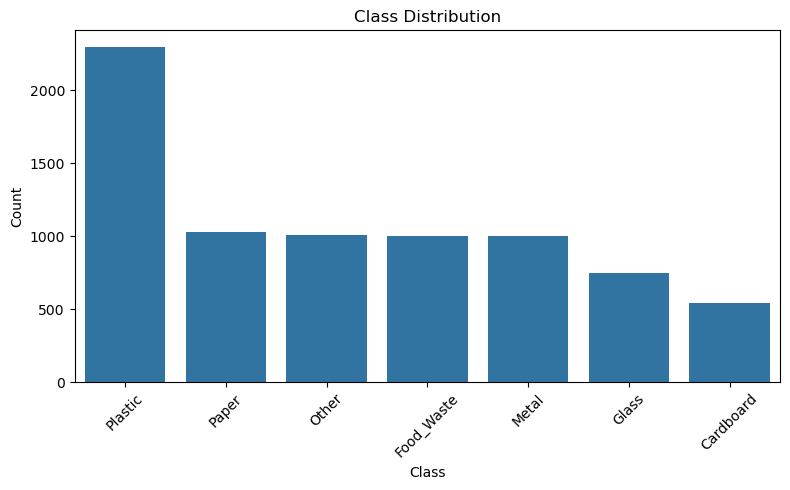

In [9]:
# Visualise Data Distribution

# Convert encoded labels to a pandas Series
label_series = pd.Series(y)

# Create the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x=label_series, order=label_series.value_counts().index)

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

Image Data Type: uint8, Image Shape: (7625, 128, 128, 3)
Total images: 7625, Image size: (128, 128, 3)


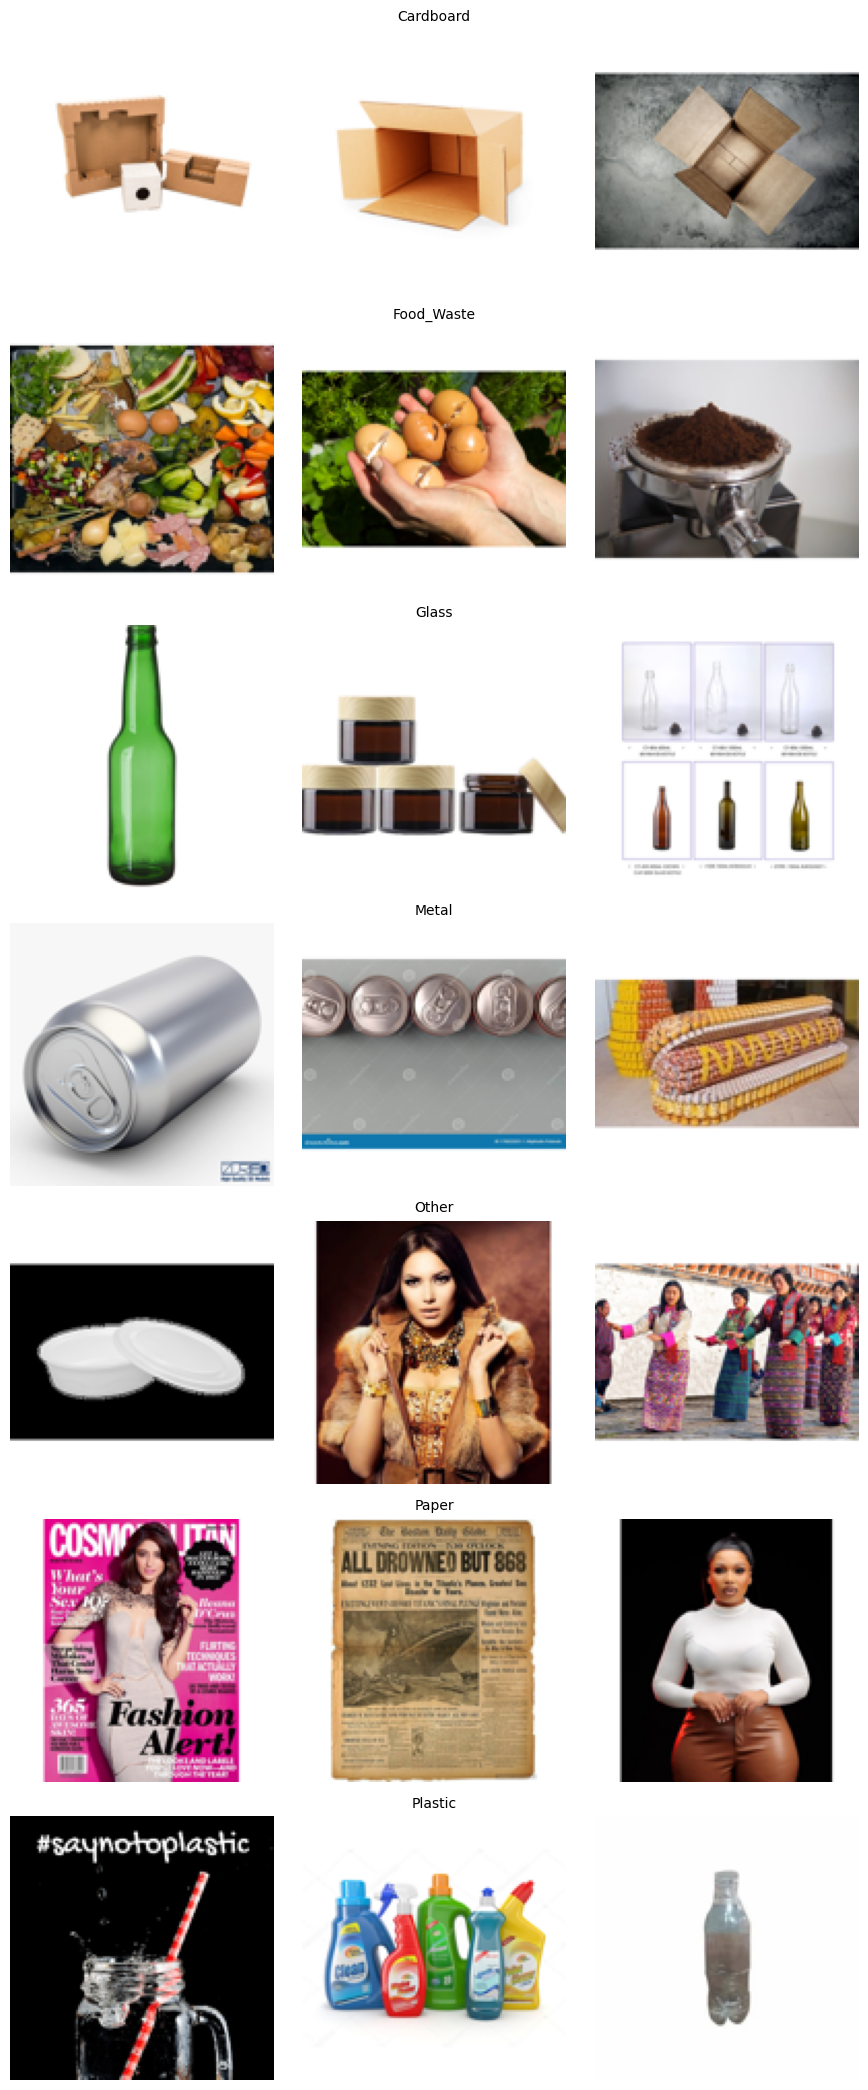

In [10]:
# Set image size
image_size = (128, 128)

# Directory containing class folders
data_directory = '/Users/shounak/Desktop/Upgrad Projects/Waste Segregation/data' 

def load_raw_image(filepath, image_size=(128, 128)):
    """
    Loads an image, converts to RGB, resizes it.
    """
    img = Image.open(filepath)
    img = img.convert("RGB")
    img = img.resize(image_size)
    return img


image_array = []
label_array = []

for label in os.listdir(data_directory):
    label_dir = os.path.join(data_directory, label)
    if os.path.isdir(label_dir):  # Skip files like .DS_Store
        for file in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file)
            if os.path.isfile(file_path):
                img = load_raw_image(file_path, image_size)
                image_array.append(img)
                label_array.append(label)

X = np.array([np.array(img, dtype=np.uint8) for img in image_array])
y = np.array(label_array)

print(f"Image Data Type: {X.dtype}, Image Shape: {X.shape}")
print(f"Total images: {X.shape[0]}, Image size: {X.shape[1:]}")


def show_image(X, y, samples_per_class=3):
    """
    Show a grid of sample images for each class.
    """
    class_names = sorted(np.unique(y))
    plt.figure(figsize=(samples_per_class * 3, len(class_names) * 3))

    for idx, class_name in enumerate(class_names):
        class_indices = np.where(y == class_name)[0]
        if len(class_indices) < samples_per_class:
            continue
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        for i, img_idx in enumerate(selected_indices):
            plt_idx = idx * samples_per_class + i + 1
            plt.subplot(len(class_names), samples_per_class, plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 1:
                plt.title(class_name, fontsize=10)

    plt.tight_layout()
    plt.show()

# 6. Visualize images
show_image(X, y, samples_per_class=3)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [11]:
# Find the smallest and largest image dimensions from the data set
min_width=0
min_height=0
max_width=0
max_height=0
for image in image_array:
    width, height = image.size
    min_width = min(min_width, width)
    min_height = min(min_height, height)
    max_width = max(max_width, width)
    max_height = max(max_height, height)

print(f"Min dimensions: ({min_width}, {min_height})")
print(f"Max dimensions: ({max_width}, {max_height})")


Min dimensions: (0, 0)
Max dimensions: (128, 128)


In [12]:
# Resize the image dimensions

print("All images resized to:", image_size)


All images resized to: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Encode the class names to integers (e.g., 'Paper' → 0, 'Plastic' → 1, ...)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

# Step 2: Convert encoded labels to one-hot vectors
y_categorical = to_categorical(encoded_labels)

# Print results
print("Original labels (sample):", y[:5])
print("Encoded labels (sample):", encoded_labels[:5])
print("One-hot encoded labels (sample):\n", y_categorical[:5])
print("Number of classes:", y_categorical.shape[1])


Original labels (sample): ['Paper' 'Paper' 'Paper' 'Paper' 'Paper']
Encoded labels (sample): [5 5 5 5 5]
One-hot encoded labels (sample):
 [[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Number of classes: 7


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [14]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Split the dataset
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    image_array, y_categorical, 
    test_size=0.2, 
    random_state=42, 
    stratify=encoded_labels  # to maintain class balance
)

# Step 2: Convert PIL images to NumPy arrays and normalize
X_train = np.array([np.array(img) for img in X_train_raw])
X_val = np.array([np.array(img) for img in X_val_raw])

# Step 3: Normalize image pixel values (0 to 1)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Step 4: Print dataset shapes
print("Training set size:", X_train.shape[0], ", Shape:", X_train.shape)
print("Validation set size:", X_val.shape[0], ", Shape:", X_val.shape)


Training set size: 6100 , Shape: (6100, 128, 128, 3)
Validation set size: 1525 , Shape: (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [15]:
# Build and compile the model
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense


model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-28 12:19:48.403792: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-05-28 12:19:48.404169: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-28 12:19:48.404521: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-05-28 12:19:48.404751: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-28 12:19:48.405293: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Create

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyperparameters
epochs = 10
batch_size = 32

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Define callbacks for early stopping and saving the best model
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    shuffle=True,
    verbose=1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,103 (3.17 MB)

 Trainable params: 832,039 (3.17 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10


2025-05-28 12:19:51.630249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3179 - loss: 1.8994
Epoch 1: val_loss improved from inf to 1.76594, saving model to best_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.3182 - loss: 1.8982 - val_accuracy: 0.3797 - val_loss: 1.7659
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4675 - loss: 1.4151
Epoch 2: val_loss improved from 1.76594 to 1.63117, saving model to best_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.4675 - loss: 1.4151 - val_accuracy: 0.4138 - val_loss: 1.6312
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5371 - loss: 1.2505
Epoch 3: val_loss improved from 1.63117 to 1.50918, saving model to best_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.5371 - loss: 1.2504 - val_accuracy: 0.4557 - val_loss: 1.5092
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6273 - loss: 1.0421
Epoch 4: val_loss improved from 1.50918 to 1.44680, sav

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5500 - loss: 1.2835
Validation Loss: 128.34%
Validation Accuracy: 56.13%


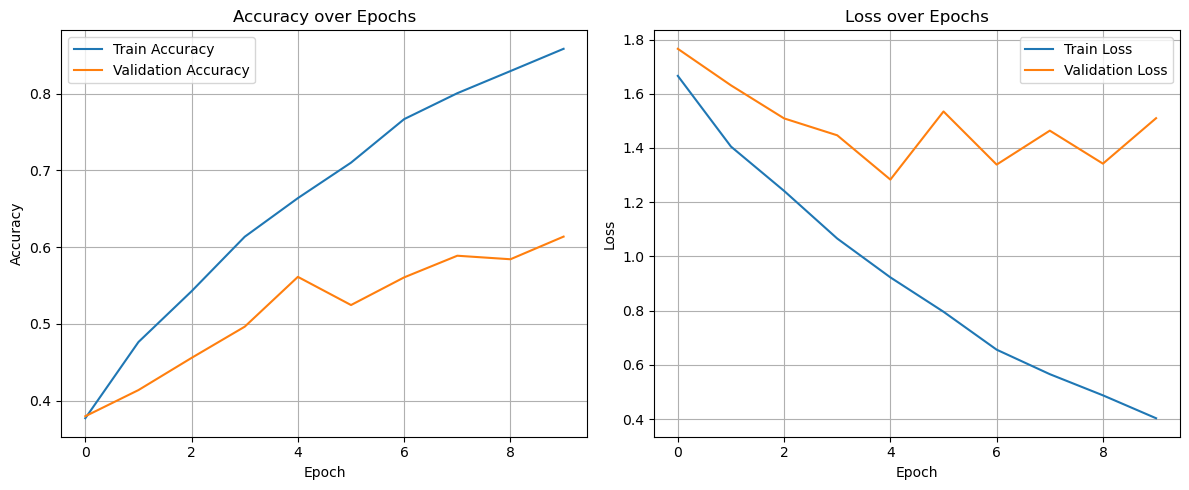

In [17]:
# Evaluate on the test set; display suitable metrics

import matplotlib.pyplot as plt

# Evaluate model performance on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Function to plot training and validation accuracy/loss curves
def plot_training_history(history, save_path=None):
    plt.figure(figsize=(12, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plt.grid(True)

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path)
        print(f"Training curves saved to {save_path}")

    plt.show()

# Call the function (optionally you can specify save_path="training_plot.png")
plot_training_history(history)


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [18]:
# Define augmentation steps to augment images

from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [19]:
# Create a function to augment the images

from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


In [20]:
# Create the augmented training dataset

def augment_images(images):
    augmented_images = []
    for img in images:
        img = tf.expand_dims(img, axis=0)  # Add batch dimension: (H, W, C) -> (1, H, W, C)
        augmented_img = data_augmentation(img)
        augmented_img = tf.squeeze(augmented_img, axis=0)  # Remove batch dimension back: (1, H, W, C) -> (H, W, C)
        augmented_images.append(augmented_img)
    return np.array(augmented_images)  # Convert the list to a numpy array


In [21]:
X_train_augmented = augment_images(X_train)
X_train_final = np.concatenate([X_train, X_train_augmented], axis=0)
y_train_final = np.concatenate([y_train, y_train], axis=0)
print(X_train_final.shape, y_train_final.shape)

(12200, 128, 128, 3) (12200, 7)


##### **4.1.2**

Train the model on the new augmented dataset.

In [22]:
# Train the model using augmented images

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyperparameters
epochs = 10              
batch_size = 32

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,  # Restore best weights after stopping
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Train the model with validation split (20% of training data used for validation)
history = model.fit(
    X_train_final,
    y_train_final,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=callbacks,
    shuffle=True,
    verbose=1
)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,103 (3.17 MB)

 Trainable params: 832,039 (3.17 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5892 - loss: 1.1523
Epoch 1: val_loss improved from inf to 2.73787, saving model to best_model.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.5892 - loss: 1.1523 - val_accuracy: 0.2939 - val_loss: 2.7379
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6431 - loss: 0.9774
Epoch 2: val_loss improved from 2.73787 to 1.62519, saving model to best_model.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.6431 - loss: 0.9774 - val_accuracy: 0.3955 - val_loss: 1.6252
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6843 - loss: 0.8821
Epoch 3: val_loss did not improve from 1.62519
305/305 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.6843 - loss: 0.8821 - val_accuracy: 0.3471 - val_loss: 2.7474
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7242 - loss: 0.7668
Epoch 4: val_loss improved from 1.62519 to 1.55465, saving model to best_model.ker

In [23]:
from tensorflow import keras

# Normalize test data (assuming pixel values need scaling)
X_test = X_val / 255.0

# Load the best saved model (good practice to load best weights before evaluation)
model = keras.models.load_model('best_model.keras')

# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_val, verbose=2)

print(f"\nTest Accuracy after augmentation: {test_accuracy * 100:.2f}%")
print(f"Test Loss after augmentation: {test_loss:.4f}")


48/48 - 1s - 24ms/step - accuracy: 0.3010 - loss: 3.4822

Test Accuracy after augmentation: 30.10%
Test Loss after augmentation: 3.4822


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

### **Conclusion and Insights**

This project implemented a CNN model for waste image classification, focusing on data preparation, training optimization, and performance evaluation.

#### **Key Practices and Learnings**
- **Data Augmentation**: Applied techniques like rotation and flipping to improve generalization and reduce overfitting.
- **Data Splitting**: Used stratified splitting to preserve class distribution across training, validation, and test sets—vital for imbalanced datasets.
- **Training Optimization**: Early stopping and checkpointing helped avoid overfitting and retained the best model.
- **Evaluation**: Model was assessed on a separate test set to measure generalization ability.

#### **Model Performance**
- **Training Accuracy**: **30.10%**
- **Test Loss after augmentation**: **3.4822**
- Results suggest underfitting; further tuning or deeper models (e.g., ResNet) are recommended.

#### **Outcome**
A baseline model was established, providing a solid foundation for future enhancement and deployment in smart waste management solutions.
